## Подготовка данных в pandas

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('C:/Trees/Churn.csv', encoding = 'cp1251', sep = ';')

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680,<31,1
1,NaN,<8,Нет,Бесплатный,CC,Мужской,Женат,"37111,5",<31,1
2,<2,<8,Нет,NaN,CC,Мужской,Женат,NaN,NaN,1
3,<2,<8,NaN,Бесплатный,CH,Мужской,Одинокий,NaN,<31,0
4,<2,NaN,Нет,Бесплатный,Auto,NaN,Одинокий,"16829,6",<31,1


In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 10 columns):
longdist    4428 non-null object
local       4430 non-null object
int_disc    4430 non-null object
billtype    4429 non-null object
pay         4429 non-null object
gender      4430 non-null object
marital     4430 non-null object
income      4427 non-null object
agecat      4430 non-null object
churn       4431 non-null int64
dtypes: int64(1), object(9)
memory usage: 346.2+ KB


In [5]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
d = {0: 'Остался', 1: 'Ушел'}

# передаем словарь в метод map
data['churn'] = data['churn'].map(d)
data.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680,<31,Ушел
1,NaN,<8,Нет,Бесплатный,CC,Мужской,Женат,"37111,5",<31,Ушел
2,<2,<8,Нет,NaN,CC,Мужской,Женат,NaN,NaN,Ушел
3,<2,<8,NaN,Бесплатный,CH,Мужской,Одинокий,NaN,<31,Остался
4,<2,NaN,Нет,Бесплатный,Auto,NaN,Одинокий,"16829,6",<31,Ушел


In [6]:
# заменяем запятые на точки и преобразуем в тип float
data['income'] = data['income'].str.replace(',', '.').astype('float')
data.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,Ушел
1,NaN,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,Ушел
2,<2,<8,Нет,NaN,CC,Мужской,Женат,NaN,NaN,Ушел
3,<2,<8,NaN,Бесплатный,CH,Мужской,Одинокий,NaN,<31,Остался
4,<2,NaN,Нет,Бесплатный,Auto,NaN,Одинокий,16829.6,<31,Ушел


In [7]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 10 columns):
longdist    4428 non-null object
local       4430 non-null object
int_disc    4430 non-null object
billtype    4429 non-null object
pay         4429 non-null object
gender      4430 non-null object
marital     4430 non-null object
income      4427 non-null float64
agecat      4430 non-null object
churn       4431 non-null object
dtypes: float64(1), object(9)
memory usage: 346.2+ KB


In [8]:
# вычислим количество дублей
np.sum(data.duplicated())

7

In [9]:
# смотрим сами дубли
data[data.duplicated(keep = False)]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
327,<2,<8,Да,Бесплатный,CC,Женский&*,_Одинокий,18831.1,46-58,Ушел
347,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Ушел
357,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Ушел
460,<2,<8,Да,Бесплатный,CC,Женский&*,_Одинокий,18831.1,46-58,Ушел
2058,21+,21-35,Нет,Бюджетный,CC,Мужской&*,_Женат,84269.0,31-45,Остался
2059,21+,21-35,Нет,Бюджетный,CC,Мужской&*,_Женат,84269.0,31-45,Остался
2146,15-20,21-35,Нет,Бесплатный,CC,Женский&*,_Женат,87404.6,46-58,Ушел
3159,9-14,56+,Нет,Бюджетный,CC,Мужской&*,_Одинокий,54643.3,31-45,Остался
3160,9-14,56+,Нет,Бюджетный,CC,Мужской&*,_Одинокий,54643.3,31-45,Остался
3832,2-8,21-35,Нет,Бесплатный,Auto,Женский,Же&нат,92353.3,46-58,Остался


In [10]:
# удаляем дубли на месте
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [11]:
# смотрим количество наблюдений
len(data)

4424

In [12]:
# смотрим статистики для количественных переменных
data.describe()

,income
count,4420.000000
mean,50297.042140
std,28440.277215
min,110.280000
25%,25445.600000
50%,50290.700000
75%,75004.500000
max,99832.900000


In [13]:
# смотрим статистики для категориальных переменных
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,longdist,local,int_disc,billtype,pay,gender,marital,agecat,churn
count,4421,4423,4423,4422,4422,4423,4423,4423,4424
unique,5,5,2,2,4,4,5,5,2
top,15-20,21-35,Нет,Бюджетный,CC,Женский,Женат,31-45,Остался
freq,1054,1444,3047,2241,2554,2235,2620,1303,2492


In [14]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['<2' nan '2-8' '9-14' '15-20' '21+']
['<8' nan '8-20' '21-35' '36-55' '56+']
['Нет' nan 'Да']
['Бюджетный' 'Бесплатный' nan]
['CC' 'CH' 'Auto' nan 'CD']
['Мужской' nan 'Женский' 'Женский&*' 'Мужской&*']
['Женат' 'Одинокий' nan '_Одинокий' '_Женат' 'Же&нат']
['<31' nan '31-45' '46-58' '59-70' '71+']
['Ушел' 'Остался']


In [15]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

15-20    1054
9-14      993
2-8       867
21+       771
<2        736
NaN         3
Name: longdist, dtype: int64
21-35    1444
8-20      763
56+       740
<8        738
36-55     738
NaN         1
Name: local, dtype: int64
Нет    3047
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2241
Бесплатный    2181
NaN              2
Name: billtype, dtype: int64
CC      2554
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский      2235
Мужской      2182
Женский&*       4
Мужской&*       2
NaN             1
Name: gender, dtype: int64
Женат        2620
Одинокий     1796
_Женат          3
_Одинокий       3
Же&нат          1
NaN             1
Name: marital, dtype: int64
31-45    1303
46-58     908
<31       755
71+       740
59-70     717
NaN         1
Name: agecat, dtype: int64
Остался    2492
Ушел       1932
Name: churn, dtype: int64


In [16]:
for i in ['gender', 'marital']:
    if i in data.columns:
        data[i]=data[i].str.replace('[*&_]', '')

In [17]:
for i in ['gender', 'marital']:
    print(data[i].value_counts(dropna=False))

Женский    2239
Мужской    2184
NaN           1
Name: gender, dtype: int64
Женат       2624
Одинокий    1799
NaN            1
Name: marital, dtype: int64


In [18]:
# data['marital'] = data['marital'].replace({'_Одинокий':'Одинокий', 
#                                            '_Женат':'Женат',
#                                            'Же&нат':'Женат'})

In [19]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = "CC"
data['pay'].value_counts(dropna = False)

CC      2556
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4429
Data columns (total 10 columns):
longdist    4421 non-null object
local       4423 non-null object
int_disc    4423 non-null object
billtype    4422 non-null object
pay         4422 non-null object
gender      4423 non-null object
marital     4423 non-null object
income      4420 non-null float64
agecat      4423 non-null object
churn       4424 non-null object
dtypes: float64(1), object(9)
memory usage: 380.2+ KB


In [21]:
data.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,Ушел
1,NaN,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,Ушел
2,<2,<8,Нет,NaN,CC,Мужской,Женат,NaN,NaN,Ушел
3,<2,<8,NaN,Бесплатный,CH,Мужской,Одинокий,NaN,<31,Остался
4,<2,NaN,Нет,Бесплатный,Auto,NaN,Одинокий,16829.6,<31,Ушел


In [22]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac = 0.7, random_state = 200)
test = data.drop(train.index)

In [23]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

longdist    3
local       1
int_disc    1
billtype    1
pay         2
gender      1
marital     1
income      3
agecat      0
churn       0
dtype: int64

In [24]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

longdist    0
local       0
int_disc    0
billtype    1
pay         0
gender      0
marital     0
income      1
agecat      1
churn       0
dtype: int64

In [25]:
# вычисляем среднее значение
# переменной income
train['income'].mean()

50241.32101809936

In [26]:
# импутируем пропуски средним значением, вычисленным 
# на обучающей выборке
train['income'].fillna(train['income'].mean(), inplace = True)
test['income'].fillna(train['income'].mean(), inplace = True)

In [27]:
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

In [28]:
train.isnull().sum()

longdist    0
local       0
int_disc    0
billtype    0
pay         0
gender      0
marital     0
income      0
agecat      0
churn       0
dtype: int64

In [29]:
test.isnull().sum()

longdist    0
local       0
int_disc    0
billtype    0
pay         0
gender      0
marital     0
income      0
agecat      0
churn       0
dtype: int64

In [30]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dummies = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dummies.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dummies = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'local', 'int_disc', 'billtype', 'pay', 'gender', 'marital', 'income', 'agecat', 'churn'] 

Переменные после get_dummies:
 ['income', 'longdist_15-20', 'longdist_2-8', 'longdist_21+', 'longdist_9-14', 'longdist_<2', 'local_21-35', 'local_36-55', 'local_56+', 'local_8-20', 'local_<8', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'agecat_31-45', 'agecat_46-58', 'agecat_59-70', 'agecat_71+', 'agecat_<31', 'churn_Остался', 'churn_Ушел']
Исходные переменные:
 ['longdist', 'local', 'int_disc', 'billtype', 'pay', 'gender', 'marital', 'income', 'agecat', 'churn'] 

Переменные после get_dummies:
 ['income', 'longdist_15-20', 'longdist_2-8', 'longdist_21+', 'longdist_9-14', 'longdist_<2', 'local_21-35', 'local_36-55', 'local_56+', 'local_8-20', 'local_<8', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетны

In [31]:
TRANS_DICT = {
    'а': 'a',
    'б': 'b',
    'в': 'v',
    'г': 'g',
    'д': 'd',
    'е': 'e',
    'ё': 'yo',
    'ж': 'zh',
    'з': 'z',
    'и': 'i',
    'й': 'y',
    'к': 'k',
    'л': 'l',
    'м': 'm',
    'н': 'n',
    'о': 'o',
    'п': 'p',
    'р': 'r',
    'с': 's',
    'т': 't',
    'у': 'u',
    'ф': 'f',
    'х': 'h',
    'ц': 'ts',
    'ч': 'ch',
    'ш': 'sh',
    'щ': 'shch',
    'ъ': 'y',
    'ы': 'y',
    'ь': "'",
    'э': 'e',
    'ю': 'yu',
    'я': 'ya'
}


def transliteration_df(df):
    df.columns = [''.join([TRANS_DICT[char] if char in TRANS_DICT else char for char in category_name.lower()]) 
                  for category_name in df.columns]
    return df

In [32]:
train_dummies = transliteration_df(train_dummies)
test_dummies = transliteration_df(test_dummies)
train_dummies.head()

,income,longdist_15-20,longdist_2-8,longdist_21+,longdist_9-14,longdist_<2,local_21-35,local_36-55,local_56+,local_8-20,...,gender_muzhskoy,marital_zhenat,marital_odinokiy,agecat_31-45,agecat_46-58,agecat_59-70,agecat_71+,agecat_<31,churn_ostalsya,churn_ushel
2867,64236.8,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
2147,57877.5,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2759,31650.0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
289,68203.8,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3098,88044.4,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [33]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_ushel']
y_test = test_dummies.loc[:, 'churn_ushel']
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'income':'agecat_<31']
X_test = test_dummies.loc[:, 'income':'agecat_<31']

## Построение модели дерева CART

In [34]:
# импортируем класс DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# создаем модель дерева CART - экземпляр класса DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=152)
# обучаем модель дерева CART
tree.fit(X_train, y_train)
# печатаем значения правильности
print('Правильность на обучающей выборке: {:.3f}'.format(tree.score(X_train, y_train)))
print('Правильность на контрольной выборке: {:.3f}'.format(tree.score(X_test, y_test)))

Правильность на обучающей выборке: 1.000
Правильность на контрольной выборке: 0.744


In [35]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# печатаем значения AUC
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, tree.predict_proba(X_train)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 1.000
AUC на контрольной выборке: 0.742


In [36]:
tree2 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20, 
                               min_samples_split = 40, random_state = 152)
tree2.fit(X_train, y_train)
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, tree2.predict_proba(X_train)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, tree2.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.866
AUC на контрольной выборке: 0.851


## Важности предикторов 

In [37]:
# выведем важности предикторов
print(tree.feature_importances_)

[0.2489944  0.01626707 0.01160418 0.02738791 0.01594521 0.05163033
 0.01905042 0.02582974 0.01819416 0.01284324 0.06094235 0.01826492
 0.01956993 0.02549365 0.02239052 0.01809321 0.02178299 0.0241712
 0.22542977 0.         0.01895454 0.01653131 0.01999011 0.01042093
 0.01100869 0.00844258 0.03076663]


In [38]:
# задаем список названий предикторов
feat_labels = X_train.columns
# записываем важности
importances =  tree2.feature_importances_
# сортирум важности по убыванию
indices = np.argsort(importances)[::-1]
# сопоставляем важности названиям предикторов
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) gender_zhenskiy                     0.547604
 2) local_<8                            0.130262
 3) longdist_<2                         0.116954
 4) agecat_<31                          0.073129
 5) agecat_31-45                        0.028537
 6) billtype_besplatnyy                 0.015827
 7) income                              0.010986
 8) local_36-55                         0.010505
 9) local_21-35                         0.009487
10) longdist_2-8                        0.008605
11) int_disc_da                         0.008473
12) longdist_9-14                       0.008359
13) int_disc_net                        0.005846
14) longdist_21+                        0.004674
15) pay_auto                            0.004025
16) marital_zhenat                      0.003942
17) longdist_15-20                      0.003934
18) local_56+                           0.003355
19) pay_ch                              0.002587
20) marital_odinokiy                    0.001277
21) agecat_46-58    

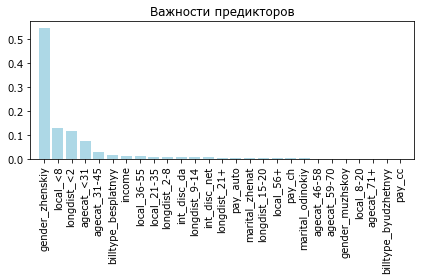

In [39]:
# задаем заголовок диаграммы
plt.title('Важности предикторов')
# настраиваем столбики  
plt.bar(range(X_train.shape[1]), importances[indices],
              color='lightblue', align='center')
# настраиваем метки оси x 
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
# задаем пределы значений оси x
plt.xlim([-1, X_train.shape[1]])
# функция tight_layout позволяет оптимально позиционировать элементы графика на рисунке,
# например, чтобы метки оси не наезжали друг друга и пр. 
plt.tight_layout()
# выводим диаграмму
plt.show()

## Построение диаграммы дерева

In [40]:
# из модуля sklearn.tree импортируем функцию export_graphviz
from sklearn.tree import export_graphviz
# с помощью функции export_graphviz на основе модели tree2 создаем файл в формате .dot, 
# предназначенный для описания диаграммы дерева
export_graphviz(tree2, out_file = 'tree_raw.dot', class_names = ['no_churn', 'churn'],
                feature_names = feat_labels, impurity = False, filled = True)

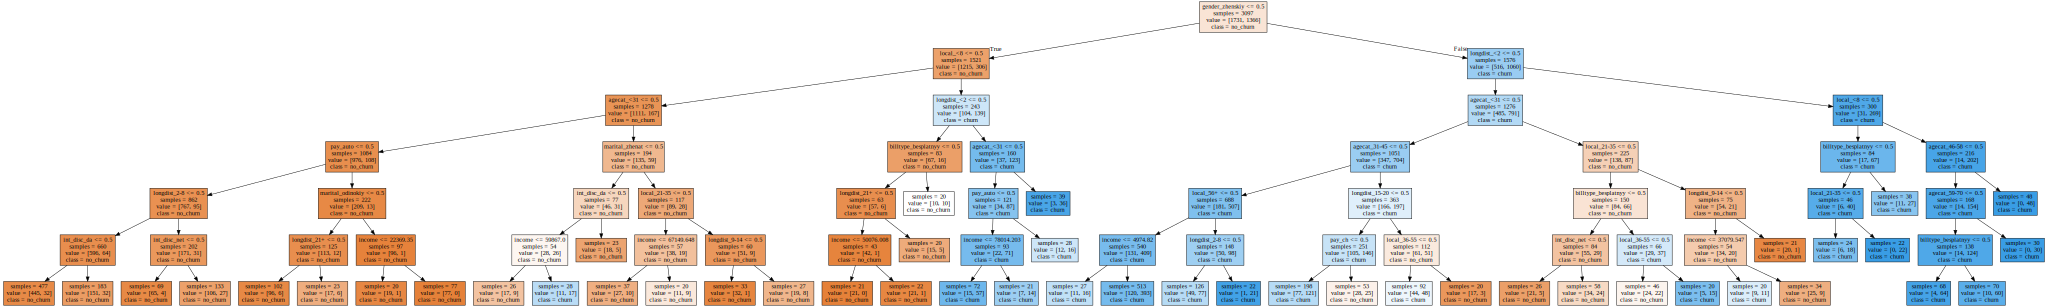

In [41]:
import graphviz

with open('tree_raw.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Прогнозы модели и матрица ошибок

In [42]:
# вычисляем с помощью метода predict прогнозы для контрольной выборки 
# и записываем в объект pred_tree
pred_tree = tree2.predict(X_test)
# из модуля sklearn.metrics импортируем функцию confusion_matrix
from sklearn.metrics import confusion_matrix
# вычисляем матрицу ошибок, передав функции confusion_matrix в качестве аргументов 
# фактические значения зависимой переменной, записанные в y_test, и спрогнозированные 
# значения зависимой переменной, записанные в pred_tree
confusion = confusion_matrix(y_test, pred_tree)
# печатаем матрицу ошибок
print('Матрица ошибок:\n{}'.format(confusion))

Матрица ошибок:
[[588 173]
 [121 445]]


## Отчет о результатах классификации: точность, полнота и F-мера

In [43]:
# из модуля sklearn.metrics импортируем функцию classification_report
from sklearn.metrics import classification_report
# вычисляем значения точности, полноты и f-меры для классов и печатаем их
print(classification_report(y_test, pred_tree,
                            target_names=['остался', 'ушел']))

             precision    recall  f1-score   support

    остался       0.83      0.77      0.80       761
       ушел       0.72      0.79      0.75       566

avg / total       0.78      0.78      0.78      1327



## Построение ROC-кривой

In [44]:
# вычисляем с помощью метода predict_proba прогнозы
# для контрольной выборки и печатаем их
print('Форма вероятностей: {}'.format(tree2.predict_proba(X_test).shape))

Форма вероятностей: (1327, 2)


In [45]:
# выведем первые несколько элементов predict_proba
print('Спрогнозированные вероятности:\n{}'.format(tree2.predict_proba(X_test[:5])))

Спрогнозированные вероятности:
[[0.20833333 0.79166667]
 [0.14285714 0.85714286]
 [0.07692308 0.92307692]
 [0.14285714 0.85714286]
 [0.20833333 0.79166667]]


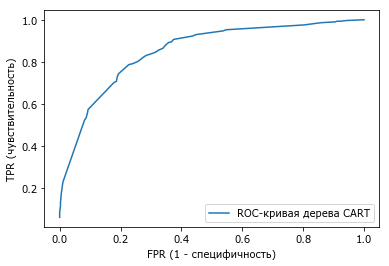

In [46]:
# из модуля sklearn.metrics импортируем функцию roc_curve
from sklearn.metrics import roc_curve
# вычисляем значения FPR и TPR для всех возможных 
# порогов отсечения, передав функции roc_curve в 
# качестве аргументов фактические значения 
# зависимой переменной, # записанные в y_test,
# и вероятности положительного класса, вычисленные 
# с помощью метода predict_proba
fpr, tpr, thresholds = roc_curve(y_test, tree2.predict_proba(X_test)[:, 1])

# создаем заголовок ROC-кривой
plt.plot(fpr, tpr, label = 'ROC-кривая дерева CART')
# задаем название для оси x
plt.xlabel('FPR (1 - специфичность)')
# задаем название для оси y
plt.ylabel('TPR (чувствительность)')
# задаем расположение легенды
plt.legend(loc=4)

In [47]:
# вычисляем значение AUC, передав функции 
# roc_curve в качестве аргументов
# фактические значения зависимой переменной, 
# записанные в y_test, # и вероятности 
# положительного класса, вычисленные с помощью 
# метода predict_proba
cart_auc = roc_auc_score(y_test, tree2.predict_proba(X_test)[:, 1])
# печатаем значение AUC
print('Значение AUC для контрольной выборки: {:.3f}'.format(cart_auc))

Значение AUC для контрольной выборки: 0.851


## Методы перекрестной проверки, реализованные в scikit-learn

In [48]:
from sklearn.model_selection import cross_val_score, KFold

In [49]:
kfold = KFold(n_splits=10)

In [50]:
# конкатенируем датафреймы
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

In [51]:
print('Значения правильности перекрестной проверки:\n{}'.
      format(cross_val_score(tree2, X, y, cv = kfold)))

Значения правильности перекрестной проверки:
[0.77878104 0.74943567 0.81489842 0.79909707 0.74660633 0.760181
 0.78054299 0.80769231 0.77828054 0.74434389]


In [52]:
kfold = KFold(n_splits = 10)
scores_acc_tree = cross_val_score(tree2, X, y, cv = kfold)
print('Среднее значение правильности перекрестной проверки: {:.2f}'.
      format(scores_acc_tree.mean()))

Среднее значение правильности перекрестной проверки: 0.78


In [53]:
kfold = KFold(n_splits = 10)
scores_auc_tree = cross_val_score(tree2, X, y, scoring = 'roc_auc', cv = kfold)
print('Среднее значение AUC перекрестной проверки: {:.2f}'.
      format(scores_auc_tree.mean()))

Среднее значение AUC перекрестной проверки: 0.84


In [54]:
kfold = KFold(n_splits=10)
scores_auc_tree = cross_val_score(tree2, X, y, scoring='roc_auc', cv=kfold)
print('Среднее значение AUC перекрестной проверки: %0.2f (+/- %0.2f)' % 
      (scores_auc_tree.mean(), scores_auc_tree.std() * 2))

Среднее значение AUC перекрестной проверки: 0.84 (+/- 0.04)


In [55]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_auc_tree = cross_val_score(tree2, X, y, scoring = 'roc_auc', cv = kfold)
print('Среднее значение AUC перекрестной проверки c перемешиванием: {:.2f}'.
      format(scores_auc_tree.mean()))

Среднее значение AUC перекрестной проверки c перемешиванием: 0.84


In [56]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = 0.3, train_size = 0.7, 
                             random_state = 42, n_splits = 10)
scores = cross_val_score(tree2, X, y, scoring = 'roc_auc', cv = shuffle_split)
print('Среднее значение AUC перекрестной проверки с перестановками: {:.2f}'.
      format(scores.mean()))

Среднее значение AUC перекрестной проверки с перестановками: 0.84


## Поиск оптимальных параметров дерева CRT

### Простой решетчатый поиск

In [57]:
# импортируем из модуля sklearn.model_selection функцию train_test_split
from sklearn.model_selection import train_test_split

# реализуем простой решетчатый поиск, метрика – правильность
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Размер обучающей выборки: {} размер контрольной выборки: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for max_depth in [4, 6, 8, 10, 12, 14, 16, 18]:
    for max_features in [3, 6, 9, 12, 15, 18, 21, 24]:
        # для каждой комбинации параметров обучаем дерево CART
        tree = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features,  
                                      random_state=42)
        tree.fit(X_train, y_train)
        # оцениваем качество дерева CART на контрольной выборке
        score = tree.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'max_features': max_features, 'max_depth': max_depth}

print('Наилучшее значение правильности: {:.2f}'.format(best_score))
print('Наилучшие значения параметров: {}'.format(best_parameters))

Размер обучающей выборки: 3318 размер контрольной выборки: 1106
Наилучшее значение правильности: 0.84
Наилучшие значения параметров: {'max_features': 6, 'max_depth': 16}


In [58]:
# реализация простого решетчатого поиска, метрика – AUC
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Размер обучающей выборки: {} размер контрольной выборки: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for max_depth in [4, 6, 8, 10, 12, 14, 16, 18]:
    for max_features in [3, 6, 9, 12, 15, 18, 21, 24]:
        # для каждой комбинации параметров обучаем дерево CART
        tree = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features,  
                                    random_state=42)
        tree.fit(X_train, y_train)
        # оцениваем качество дерева CART на контрольной выборке
        auc_score = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
        # если получаем наилучшее значение AUC, сохраняем значение и параметры
        if auc_score > best_score:
            best_score = auc_score
            best_parameters = {'max_features': max_features, 'max_depth': max_depth}

print('Наилучшее значение AUC: {:.2f}'.format(best_score))
print('Наилучшие значения параметров: {}'.format(best_parameters))

Размер обучающей выборки: 3318 размер контрольной выборки: 1106
Наилучшее значение AUC: 0.86
Наилучшие значения параметров: {'max_features': 6, 'max_depth': 12}


### Решетчатый поиск с комбинированной проверкой

#### В ручном режиме

In [59]:
from sklearn.model_selection import StratifiedKFold
strat = StratifiedKFold(n_splits = 10, shufﬂe = True, random_state = 42)

# разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print('Размер обучающей выборки: {} размер тестовой выборки: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for max_depth in [4, 6, 8, 10, 12, 14, 16, 18]:
    for max_features in [3, 6, 9, 12, 15, 18, 21, 24]:
        # для каждой комбинации параметров создаем экземпляр класса
        tree = DecisionTreeClassifier(max_depth = max_depth, max_features = max_features,  
                                      random_state=42)
        # выполняем перекрестную проверку        
        scores = cross_val_score(tree, X_train, y_train, scoring = 'roc_auc', cv = strat)
        # вычисляем среднее значение AUC по контрольным блокам перекрестной проверки 
        auc_score = np.mean(scores)
        # если получаем лучшее значение AUC, сохраняем его и параметры
        if auc_score > best_score:
            best_score = auc_score
            best_parameters = {'max_features': max_features, 'max_depth': max_depth}
# строим модель с параметрами, давшими наилучшее значение AUC, на обучающей выборке, 
# и проверяем на тестовой выборке
tree_best = DecisionTreeClassifier(**best_parameters, random_state = 42)
tree_best.fit(X_train, y_train)
test_score = roc_auc_score(y_test, tree_best.predict_proba(X_test)[:, 1])
print('Лучшее усредненное значение AUC cv: {:.2f}'.format(best_score))
print('Наилучшие значения параметров: ', best_parameters)
print('AUC модели с наилучшими параметрами на тестовой выборке: {:.2f}'.format(test_score))

Размер обучающей выборки: 3318 размер тестовой выборки: 1106
Лучшее усредненное значение AUC cv: 0.86
Наилучшие значения параметров:  {'max_features': 6, 'max_depth': 12}
AUC модели с наилучшими параметрами на тестовой выборке: 0.86


#### Класс GridSearchCV

In [60]:
param_grid = {'max_features': [3, 6, 9, 12, 15, 18, 21, 24],
              'max_depth': [4, 6, 8, 10, 12, 14, 16, 18]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'max_features': [3, 6, 9, 12, 15, 18, 21, 24], 'max_depth': [4, 6, 8, 10, 12, 14, 16, 18]}


In [61]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=42)
grid_search_acc = GridSearchCV(tree, param_grid, cv=strat)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
grid_search_acc.fit(X_train, y_train)
print("Правильность на тестовой выборке: {:.2f}".format(grid_search_acc.score(X_test, y_test)))

Правильность на тестовой выборке: 0.82


In [62]:
grid_search_auc = GridSearchCV(tree, param_grid, scoring = 'roc_auc', cv = strat, return_train_score=True)
grid_search_auc.fit(X_train, y_train)
test_score = roc_auc_score(y_test, grid_search_auc.predict_proba(X_test)[:, 1])
print('AUC на тестовой выборке: {:.2f}'.format(test_score))
print('Наилучшие значения параметров: {}'.format(grid_search_auc.best_params_))
print('Наилучшее значение AUC: {:.2f}'.format(grid_search_auc.best_score_))
print('Оптимальная модель:\n{}'.format(grid_search_auc.best_estimator_))

AUC на тестовой выборке: 0.86
Наилучшие значения параметров: {'max_depth': 12, 'max_features': 6}
Наилучшее значение AUC: 0.86
Оптимальная модель:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


In [63]:
# преобразуем в DataFrame
results = pd.DataFrame(grid_search_auc.cv_results_)
# показываем первые 5 строк
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005097,0.003416,0.001798,0.001077,4,3,"{'max_depth': 4, 'max_features': 3}",0.775896,0.791690,0.822890,...,0.799524,0.797275,0.815090,0.803578,0.808642,0.800682,0.800632,0.801170,0.802576,0.005784
1,0.003598,0.000490,0.001099,0.000300,4,6,"{'max_depth': 4, 'max_features': 6}",0.808292,0.789869,0.838040,...,0.818004,0.808180,0.807467,0.818608,0.812972,0.824637,0.808610,0.821832,0.816553,0.006353
2,0.006895,0.002209,0.002698,0.003464,4,9,"{'max_depth': 4, 'max_features': 9}",0.812521,0.823571,0.836790,...,0.820127,0.826882,0.824471,0.828105,0.814899,0.833948,0.820056,0.830510,0.825580,0.005620
3,0.006896,0.003047,0.001799,0.000978,4,12,"{'max_depth': 4, 'max_features': 12}",0.830024,0.833241,0.850450,...,0.833247,0.830331,0.834187,0.833002,0.839995,0.831909,0.832445,0.830332,0.833600,0.002701
4,0.004897,0.000300,0.001300,0.000640,4,15,"{'max_depth': 4, 'max_features': 15}",0.842545,0.835319,0.841533,...,0.834998,0.832334,0.835202,0.834179,0.838698,0.838857,0.836059,0.837129,0.835767,0.001917


In [64]:
table = results.pivot_table(values=["mean_test_score"],    
                            index=["param_max_depth","param_max_features"])
print(table)

                                    mean_test_score
param_max_depth param_max_features                 
4               3                          0.785660
                6                          0.807281
                9                          0.816390
                12                         0.829661
                15                         0.831406
                18                         0.819508
                21                         0.834511
                24                         0.833418
6               3                          0.800358
                6                          0.832290
                9                          0.844582
                12                         0.833407
                15                         0.836321
                18                         0.842391
                21                         0.839636
                24                         0.839192
8               3                          0.833856
            

## Построение теплокарты

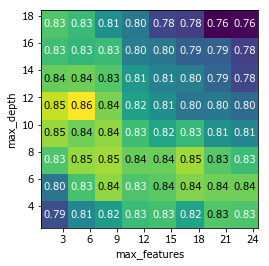

In [65]:
# пишем функцию, которая будет строить теплокарту усредненных значений AUC
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap = None,
            vmin = None, vmax = None, ax = None, fmt = '%0.2f'):
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap = cmap, vmin = None, vmax = None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .8)
    ax.set_yticks(np.arange(len(yticklabels)) + .8)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color = c, ha = 'center', va = 'center')
    return img

# создаем массив усредненных значений AUC
scores = np.array(results.mean_test_score).reshape(8, 8)
# строим теплокарту на основе усредненных значений AUC
heatmap(scores, xlabel = 'max_features', xticklabels = param_grid['max_features'],
                      ylabel = 'max_depth', yticklabels = param_grid['max_depth'], cmap = 'viridis')

In [66]:
df = data.copy()
df.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,Ушел
1,NaN,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,Ушел
2,<2,<8,Нет,NaN,CC,Мужской,Женат,NaN,NaN,Ушел
3,<2,<8,NaN,Бесплатный,CH,Мужской,Одинокий,NaN,<31,Остался
4,<2,NaN,Нет,Бесплатный,Auto,NaN,Одинокий,16829.6,<31,Ушел


In [67]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy = 'mean',filler = 'NA'):
        self.strategy = strategy
        self.fill = filler

    def fit(self, X, y=None):
        if self.strategy in ['mean','median']:
            if not all(X.dtypes == np.number):
                raise ValueError('dtypes mismatch np.number dtype is \
                required for '+ self.strategy)
        if self.strategy == 'mean':
            self.fill = X.mean()
        elif self.strategy == 'median':
            self.fill = X.median()
        elif self.strategy == 'mode':
            self.fill = X.mode().iloc[0]
        elif self.strategy == 'fill':
            if type(self.fill) is list and type(X) is pd.DataFrame:
                self.fill = dict([(cname, v) for cname,v in zip(X.columns, self.fill)])
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [68]:
imputed_df = CustomImputer(strategy='mode').fit_transform(df)
imputed_df.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,Ушел
1,15-20,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,Ушел
2,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,50290.7,31-45,Ушел
3,<2,<8,Нет,Бесплатный,CH,Мужской,Одинокий,50290.7,<31,Остался
4,<2,21-35,Нет,Бесплатный,Auto,Женский,Одинокий,16829.6,<31,Ушел


In [69]:
df = data.copy()

In [70]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
for i in categorical_columns:
    df[i] = df[i].fillna('Missing')
df.head()

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
0,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,Ушел
1,Missing,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,Ушел
2,<2,<8,Нет,Missing,CC,Мужской,Женат,NaN,Missing,Ушел
3,<2,<8,Missing,Бесплатный,CH,Мужской,Одинокий,NaN,<31,Остался
4,<2,Missing,Нет,Бесплатный,Auto,Missing,Одинокий,16829.6,<31,Ушел


In [71]:
df_dummies = pd.get_dummies(df)

In [72]:
X = df_dummies.loc[:, 'income':'agecat_Missing']
y = df_dummies.loc[:, 'churn_Ушел']

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

pipe = Pipeline([('impute', Imputer(strategy='mean')), 
                 ('tree', DecisionTreeClassifier(max_depth = 6, 
                                                 min_samples_leaf = 20, 
                                                 min_samples_split = 40, 
                                                 random_state = 152))])
mean_auc = cross_val_score(pipe, X, y, scoring='roc_auc', cv = 10).mean()
mean_auc

0.7046715550627273

In [74]:
X['income'].fillna(X['income'].mean(), inplace = True)
kfold = KFold(n_splits = 10)
scores_auc_tree = cross_val_score(tree2, X, y, scoring = 'roc_auc', cv = kfold)
print('Среднее значение AUC перекрестной проверки: {:.2f}'.
      format(scores_auc_tree.mean()))

Среднее значение AUC перекрестной проверки: 0.74
